In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from scipy import stats

In [4]:
# Load the data:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx')

In [5]:
# Dispaly the data:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [6]:
# Drop the EmpNumber column permanently as it is of no use:
data.drop('EmpNumber',axis=1, inplace=True)

In [7]:
data.head().T

,0,1,2,3,4
Age,32,47,40,41,60
Gender,Male,Male,Male,Male,Male
EducationBackground,Marketing,Marketing,Life Sciences,Human Resources,Marketing
MaritalStatus,Single,Single,Married,Divorced,Single
EmpDepartment,Sales,Sales,Sales,Human Resources,Sales
EmpJobRole,Sales Executive,Sales Executive,Sales Executive,Manager,Sales Executive
BusinessTravelFrequency,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely
DistanceFromHome,10,14,5,10,16
EmpEducationLevel,3,4,4,4,4
EmpEnvironmentSatisfaction,4,4,4,2,1


# STATISTICAL ANALYSIS:

In [8]:
data.describe() # Numerical Columns:

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [9]:
# Categorical Columns Statistical Analysis:
data.describe(include='object')

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200
unique,2,6,3,6,19,3,2,2
top,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,725,492,548,373,270,846,847,1022


# MANUAL EDA:

**Univariate Analysis:**

# (1)EmpNumber- Unique ID for each employee and can be used for referring a particular employee.

# (2)AGE:

In [332]:
# Display of unique values in Age Column:
data.Age.unique()

array([32, 47, 40, 41, 60, 27, 50, 28, 36, 38, 44, 30, 29, 42, 34, 39, 56,
       53, 35, 52, 33, 25, 45, 23, 26, 54, 37, 24, 49, 55, 43, 51, 22, 31,
       58, 20, 21, 48, 19, 18, 59, 46, 57], dtype=int64)

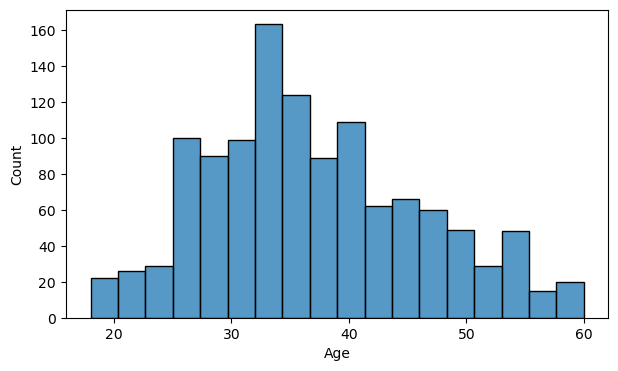

In [19]:
# PLot the Age column with a Histogram:
plt.figure(figsize=(7,4))
sns.histplot(x='Age',data=data)
plt.xlabel('Age',fontsize=10)
plt.show()

# Insights from the above graph:
1. Minimum age is 18.
2. Maximum age is 60.
3. Mean/Average age approximately is 36 years.
4. Maximum employees are in the age group of 25 to 40 years.

# (3)GENDER:

In [22]:
# Display of unique values in Gender Column:
data.Gender.value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

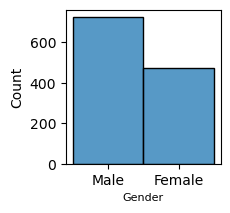

In [23]:
# Plot of Gender column:
plt.figure(figsize=(2,2))
sns.histplot(x='Gender',data=data)
plt.xlabel('Gender',fontsize=8)
plt.show()

# Insights from the above graph:
1. Female = 0, Male= 1 (Numeric Values assigned)
2. Total Male Employees= 725
3. Total Female Employees = 475
4. Total Employee strength =1200.
5. 60% of employees are Male and 40% of employees are Female.

# (4)EducationBackground of Employees:

In [334]:
data.EducationBackground.value_counts() 

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

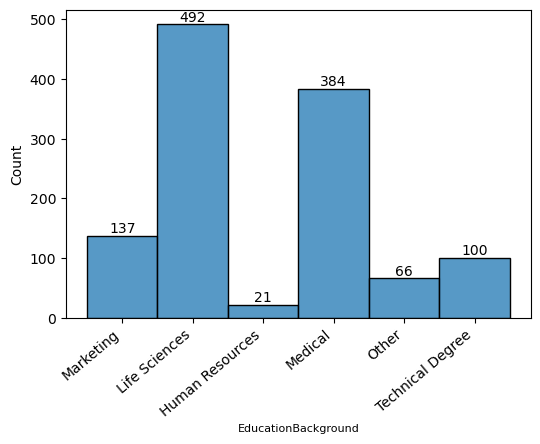

In [336]:
plt.figure(figsize=(6,4))

ax =sns.histplot(x='EducationBackground',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.05  # Slightly above the bar
    ax.text(x, y, f'{height:}', ha='center', va='bottom')


plt.xticks(rotation=40,ha='right')
plt.xlabel('EducationBackground',fontsize=8)
plt.show()

# Insights from the above graph:
* 21 employees with Human Resources background. 
* 492 employees with Life Sciences background.
* 137 employees with Marketing background.
* 384 employees with Medical background.
* 66 employees with Other Qualifications.
* 100 employees with Technical Degree.
* So 41 % of employees are from Life Sciences and 32% from medical backgrounds and the remaining in other academic disciplines.

# (5)MaritalStatus:

In [30]:
data.MaritalStatus.value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

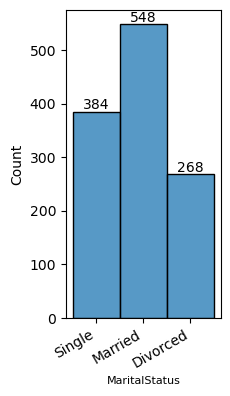

In [31]:
plt.figure(figsize=(2,4))
ax=sns.histplot(x='MaritalStatus',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xticks(rotation=30,ha='right')
plt.xlabel('MaritalStatus',fontsize=8)
plt.show()

# Insights from the above graph:
* Married employees = 548
* Single employees = 384
* Divorced employees = 268

# (6)EmpDepartment: Total Six Departments.

In [34]:
data.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

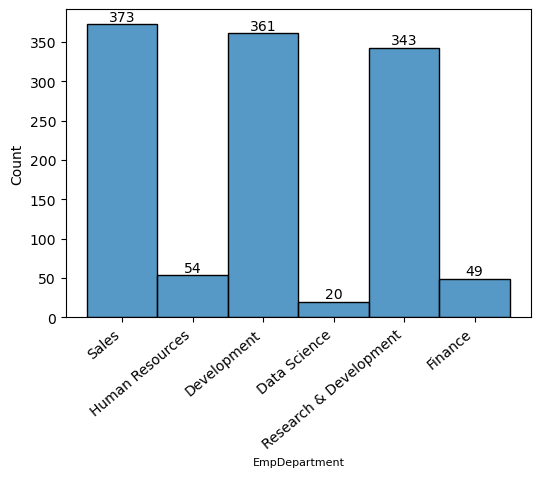

In [35]:
plt.figure(figsize=(6,4))
ax=sns.histplot(x='EmpDepartment',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xticks(rotation=40,ha='right')
plt.xlabel('EmpDepartment',fontsize=8)
plt.show()

# Insights from the above graph:
* Sales = 373 employees
* Development = 361 employees
* Research & Development = 343
* Human Resources = 54 employees
* Finance = 49 employees
* Data Science = 20 employees
* Majority of employees in these deparments = Sales 31%, Development 30%, Research & Development 28.5%

# (7)EmpJobRole

In [338]:
data.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

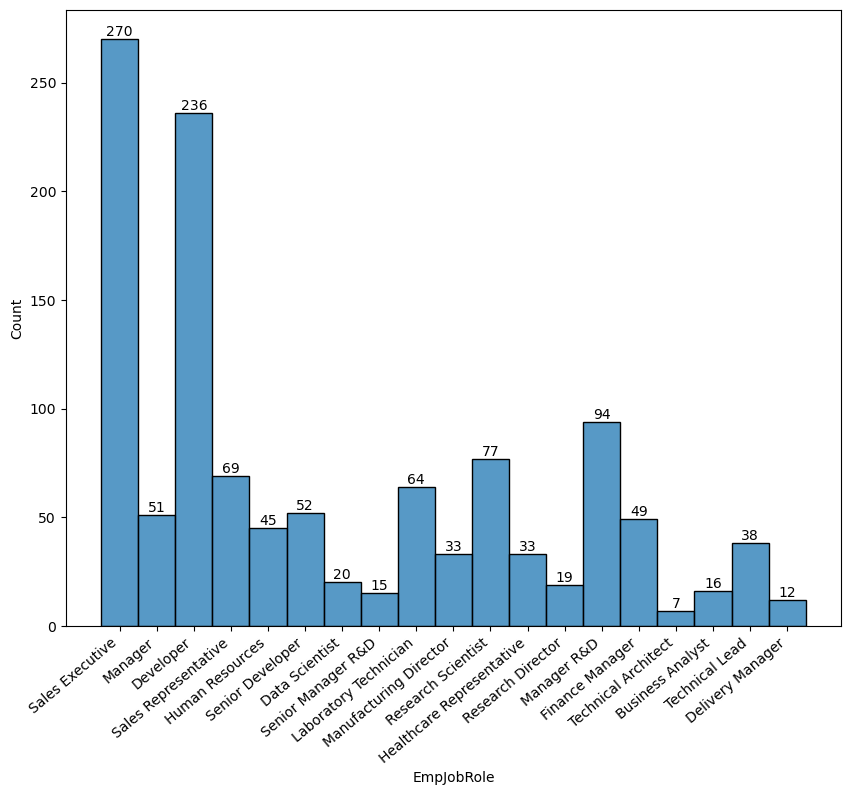

In [340]:
plt.figure(figsize=(10,8))
ax= sns.histplot(x='EmpJobRole',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xticks(rotation=40,ha='right')
plt.xlabel('EmpJobRole',fontsize=10)
plt.show()

# Insights from the above graph:
* Highest no of Employee percentage is in the role of Sales Excutive (22.5%) and Developer (19.6%).

# (8)BusinessTravelFrequency:

In [42]:
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

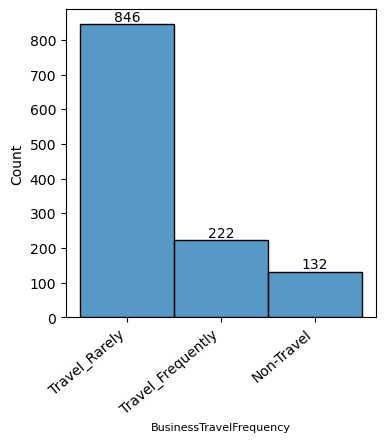

In [43]:
plt.figure(figsize=(4,4))
ax=sns.histplot(x='BusinessTravelFrequency',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xticks(rotation=40,ha='right')
plt.xlabel('BusinessTravelFrequency',fontsize=8)
plt.show()

# Insights from the above graph:
* Non-Travel = 132 employees.
* Travel_Frequently = 222 employees.
* Travel_Rarely = 846 employees.

# (9)DistanceFromHome: Distance from Home to Office:

In [46]:
data.DistanceFromHome.mean()

9.165833333333333

In [47]:
data.DistanceFromHome.unique()

array([10, 14,  5, 16,  8,  1, 24,  3, 27, 19,  9,  2,  7,  6, 26, 11, 23,
       13, 29, 12,  4, 25, 21, 18, 20, 17, 22, 28, 15], dtype=int64)

In [48]:
data.DistanceFromHome.value_counts()

DistanceFromHome
2     184
1     170
8      69
3      67
10     66
9      66
7      65
5      54
4      51
6      46
16     25
11     25
18     24
24     23
29     23
23     22
26     22
28     20
25     19
20     19
19     18
14     17
17     17
22     17
15     17
12     16
21     15
13     14
27      9
Name: count, dtype: int64

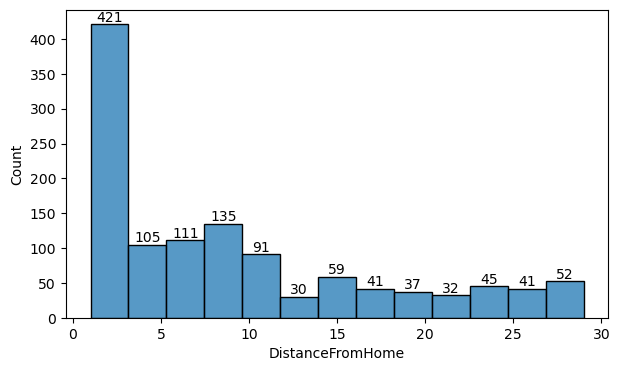

In [49]:
plt.figure(figsize=(7,4))
ax=sns.histplot(x='DistanceFromHome',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('DistanceFromHome',fontsize=10)
plt.show()

# Insights from the above graph:
* Shortest distance from home to Office is 1 Km.
* Longets dictance from home to office is 29 Kms.
* Almost 50% of employees stay nearer to Office.

# (10)EmpEducationLevel: Highest education level of an employee.

In [52]:
data.EmpEducationLevel.unique()

array([3, 4, 2, 5, 1], dtype=int64)

In [53]:
data.EmpEducationLevel.value_counts()

EmpEducationLevel
3    449
4    322
2    239
1    148
5     42
Name: count, dtype: int64

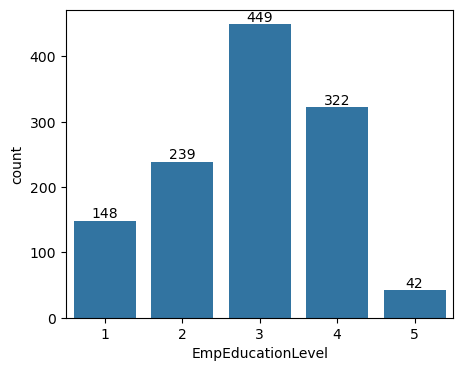

In [54]:
plt.figure(figsize=(5,4))
ax= sns.countplot(x='EmpEducationLevel',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('EmpEducationLevel',fontsize=10)
plt.show()

# Insights from the above graph:
1. Below College - 148 employees.
2. College - 239 employees.
3. Bachelor - 449 employees.
4. Master's - 322 employees.
5. Doctor - 42 employees.
* 37% of Employees have done Graduation.
*  26% have done Master's.
*  19.9% have done College.
*  12.3% are below college and 3.5% are doctors.

# (11)EmpEnvironmentSatisfaction:

In [57]:
data.EmpEnvironmentSatisfaction.value_counts()

EmpEnvironmentSatisfaction
3    367
4    361
2    242
1    230
Name: count, dtype: int64

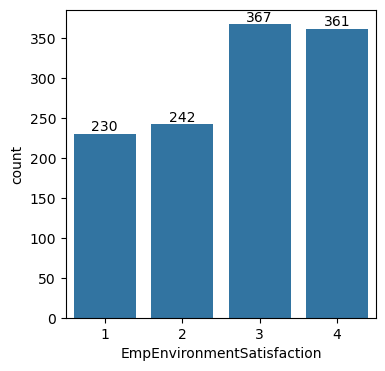

In [58]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x='EmpEnvironmentSatisfaction',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('EmpEnvironmentSatisfaction',fontsize=10)
plt.show()

# Insights from the above graph:
1 Low
2 Medium
3 High
4 Very High
* 30% of the employess are highly statisfied with their environment.
* 30% of the employees are very highly satisfied with their environment.
* 20% of employees are okay with thier environment.
* 19% of employees are not satisfied with their environment.

# (12)EmpHourlyRate:

In [61]:
data.EmpHourlyRate.unique()

array([ 55,  42,  48,  73,  84,  32,  54,  67,  63,  81,  49,  99,  57,
        96,  44,  86,  83,  61,  80,  31,  46,  79,  77,  60,  76,  41,
        71,  66,  38,  72,  95,  82,  75,  93,  64,  36,  69,  33,  35,
        40,  43,  51,  52,  98,  45,  37,  94,  59,  88,  50,  65,  53,
        56,  78,  74,  91,  62,  87,  68,  34,  70, 100,  92,  39,  97,
        47,  90,  85,  30,  58,  89], dtype=int64)

In [62]:
data.EmpHourlyRate.mean()

65.98166666666667

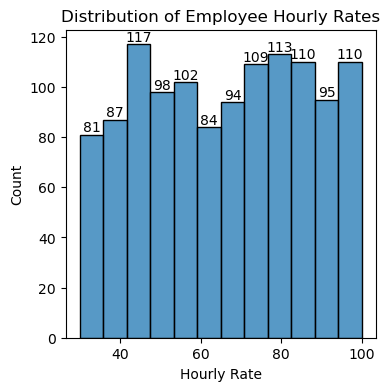

In [63]:
plt.figure(figsize=(4,4))
ax= sns.histplot(data['EmpHourlyRate']) # Adjust 'bins' as needed
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.title('Distribution of Employee Hourly Rates')
plt.xlabel('Hourly Rate')
plt.show()

# Insights from the above graph:
* Hourly rate differs based on Employee experience and Job role.
* Min hours is 31 and Maximum hours is 100 per week.
* Mean/Average hours is 65.98 per week. 

# (13)EmpJobInvolvement:

In [66]:
data.EmpJobInvolvement.value_counts()

EmpJobInvolvement
3    724
2    294
4    112
1     70
Name: count, dtype: int64

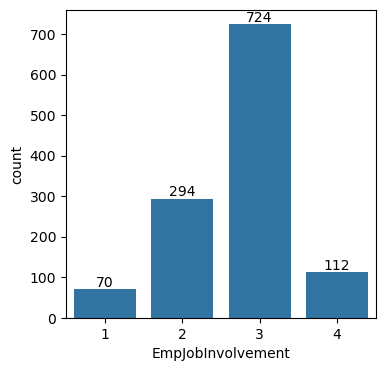

In [67]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='EmpJobInvolvement',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('EmpJobInvolvement',fontsize=10)
plt.show()

# Insights from the above graph:
1 Low
2 Medium		
3 High 
4 Very High
* 60% of employees involvement is high.
* 19% of employees involvement is very high.
* 24.5% of employees involvement is Okay.
* 5.8% of employees involvement is very less.

# (14)EmpJobLevel:

In [70]:
data.EmpJobLevel.value_counts()

EmpJobLevel
2    441
1    440
3    173
4     90
5     56
Name: count, dtype: int64

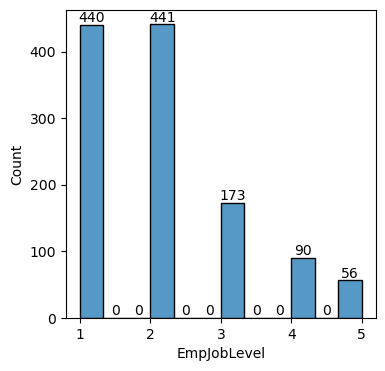

In [71]:
plt.figure(figsize=(4,4))
ax= sns.histplot(x='EmpJobLevel',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('EmpJobLevel',fontsize=10)
plt.show()

# Insights from the above graph:
* Job level(2) and (1) have got 73.35% of Employees.
* Job level (3) got 14.41% of employees.
* 12% of employees are in level 4 and 5.

# (15)EmpJobSatisfaction:

In [74]:
data.EmpJobSatisfaction.value_counts()

EmpJobSatisfaction
4    378
3    354
2    237
1    231
Name: count, dtype: int64

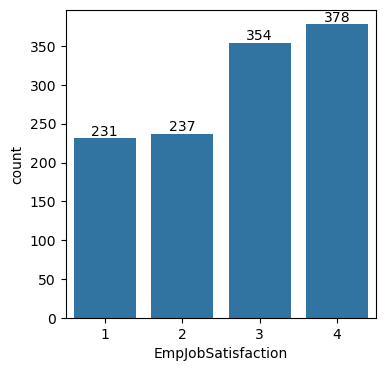

In [75]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='EmpJobSatisfaction',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('EmpJobSatisfaction',fontsize=10)
plt.show()

# Insights from the above graph:
1 Low
2 Medium		
3 High
4 Very High
* 31% of employees have got very high Job Satisfaction.
* 29.5% of employees have got high Job Satisfaction.
* 19.7% of employees are okay/medium satisfied with their jobs.
* And the last 19.2% of employees are not all staisfied. 

# (16)NumCompaniesWorked:

In [78]:
data.NumCompaniesWorked.value_counts()

NumCompaniesWorked
1    433
0    156
3    133
2    123
4    107
7     60
6     56
5     53
8     40
9     39
Name: count, dtype: int64

In [79]:
data.NumCompaniesWorked.unique()

array([1, 2, 5, 3, 8, 7, 9, 4, 6, 0], dtype=int64)

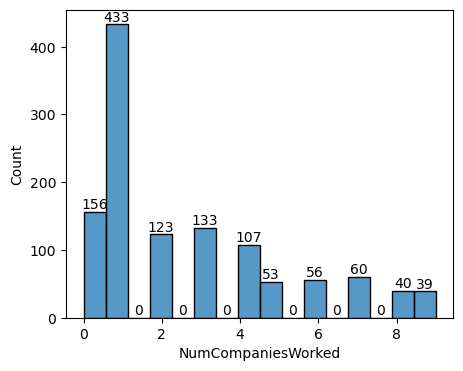

In [80]:
plt.figure(figsize=(5,4))
ax=sns.histplot(x='NumCompaniesWorked',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('NumCompaniesWorked',fontsize=10)
plt.show()

# Insights from the above graph:
* 36% of the employees have worked only in one comapny in the past.
* 13% of the employees are freshers.
* 30.25% of employees have worked in 3-4 companies in the past.
* 20.6% of the employees have worked in 5 to 9 companies in the past.

# (17)OverTime:

In [83]:
data.OverTime.unique()

array(['No', 'Yes'], dtype=object)

In [84]:
data.OverTime.value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

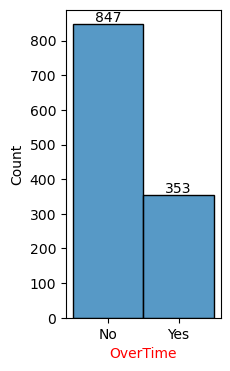

In [85]:
plt.figure(figsize=(2,4))
ax=sns.histplot(x='OverTime',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xticks(rotation='horizontal')
plt.xlabel('OverTime',fontsize=10, color='red')
plt.show()

# Insights from the above graph:
* 70.5% of employees are not doing overtime.
* 29.4% of employees are doing overtime.

# (18)EmpLastSalaryHikePercent:

In [88]:
data.EmpLastSalaryHikePercent.unique()

array([12, 21, 15, 14, 13, 23, 11, 20, 19, 17, 18, 22, 16, 24, 25],
      dtype=int64)

In [89]:
data.EmpLastSalaryHikePercent.value_counts()

EmpLastSalaryHikePercent
14    172
11    169
13    168
12    155
15     82
18     73
16     68
17     67
19     63
20     50
22     47
21     34
23     21
24     18
25     13
Name: count, dtype: int64

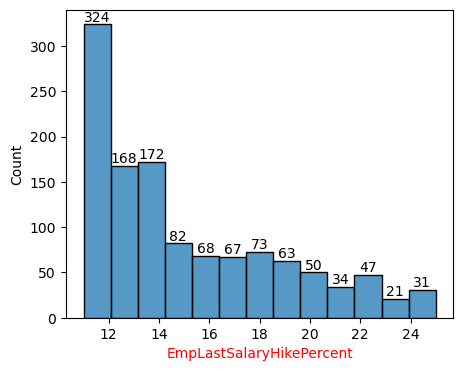

In [90]:
plt.figure(figsize=(5,4))
ax = sns.histplot(x='EmpLastSalaryHikePercent',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xticks(rotation='horizontal')
plt.xlabel('EmpLastSalaryHikePercent',fontsize=10, color='red')
plt.show()

# Insights from the above graph:
* Least Salary Hike percentage is 11%.
* Highest Salary Hike percentage is 25%.
* 55.33% of employees have got salary hike between 11 to 14%.
* 43.58% of employees have got salary hike between between 15% to 24%.
* 1% of employees have got a hike of 25%.

# (19)EmpRelationshipSatisfaction:

In [93]:
data.EmpRelationshipSatisfaction.value_counts()

EmpRelationshipSatisfaction
3    379
4    355
2    247
1    219
Name: count, dtype: int64

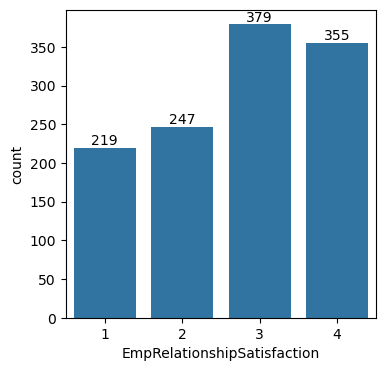

In [94]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='EmpRelationshipSatisfaction',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xticks(rotation='horizontal')
plt.xlabel('EmpRelationshipSatisfaction',fontsize=10)
plt.show()

# Insights from the above graph:
1 Low
2 Medium		
3 High
4 Very High
* 31.5% of employees have high employee relation satisfaction.
* 29.5% of employees have very high employee relation satisfaction.
* 20.5% of employees are okay with employee relation satisfaction.
* 18.25% of employees have low employee relation satisfaction.
* 3 & 4 Scores are good for the company

# (20)EmpWorkLifeBalance:

In [97]:
data.EmpWorkLifeBalance.value_counts()

EmpWorkLifeBalance
3    727
2    294
4    115
1     64
Name: count, dtype: int64

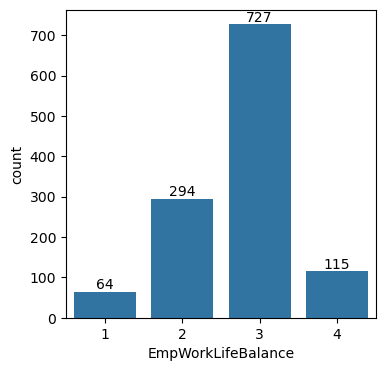

In [98]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='EmpWorkLifeBalance',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('EmpWorkLifeBalance',fontsize=10)
plt.show()

# Insights from the above graph:
Score of employee WorkLifeBalance:
1 Bad
2 Good
3 Better
4 Best
* 60.5% of employees are Better in WorkLifeBalance.
* 24.5% - of employees are Good in WorkLifeBalance.
* 9.5% -  of employees are Best in WorkLifeBalance.
* 5.3% of employees are Bad in WorkLifeBalance.

# (21)TotalWorkExperienceInYears:

In [101]:
data.TotalWorkExperienceInYears.unique()

array([10, 20, 23,  9,  4, 28,  1,  7, 12, 30,  5,  2, 19, 16, 34,  6,  8,
       11, 17,  3, 14, 26, 13, 22,  0, 29, 18, 35, 33, 31, 24, 15, 32, 21,
       27, 25, 36, 37, 38, 40], dtype=int64)

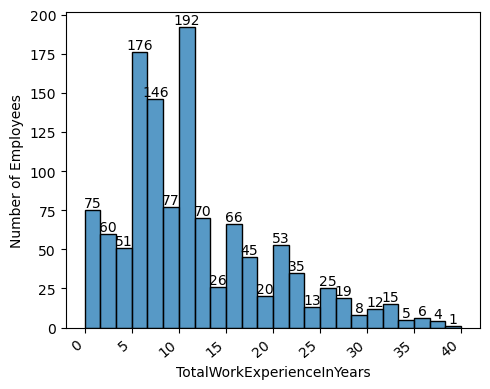

In [102]:
plt.figure(figsize=(5,4))
ax=sns.histplot(x='TotalWorkExperienceInYears',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('TotalWorkExperienceInYears',fontsize=10)
plt.ylabel('Number of Employees')
plt.xticks(rotation=40,ha='right')
plt.tight_layout()
plt.show()

# Insights from the above graph:
* Work experience ranges from zero to 40 years.
* Employees with 10 to 15 years of work experience are more.

# (22)TrainingTimesLastYear: 	

In [105]:
data.TrainingTimesLastYear.unique()

array([2, 1, 4, 5, 6, 3, 0], dtype=int64)

In [106]:
data.TrainingTimesLastYear.value_counts()

TrainingTimesLastYear
2    445
3    413
4     98
5     98
1     56
6     46
0     44
Name: count, dtype: int64

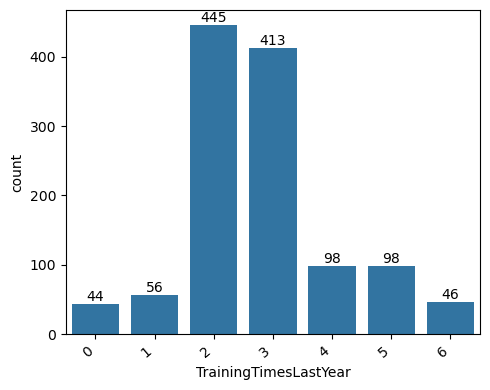

In [107]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='TrainingTimesLastYear',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('TrainingTimesLastYear',fontsize=10)
#plt.ylabel('Number of Employees')
plt.xticks(rotation=40,ha='right')
plt.tight_layout()
plt.show()

# Insights from the above graph:
* 71.6% of employees have undergone training upto two or three times in the past year,
* 24.8% 0f employees have undergone training for one to six times in the past year.
* 3.6% of the employees have not done any training in the past year.

# (23)ExperienceYearsAtThisCompany:

In [110]:
data.ExperienceYearsAtThisCompany.unique()

array([10,  7, 18, 21,  2,  9,  8,  1,  5, 22,  4,  0, 34,  6, 15,  3, 13,
       26, 20, 12, 31, 16, 11, 14, 17, 19, 32, 24, 33, 29, 25, 36, 30, 23,
       27, 37, 40], dtype=int64)

In [111]:
data.ExperienceYearsAtThisCompany.value_counts()

ExperienceYearsAtThisCompany
5     152
1     138
2     107
3     105
10    100
4      88
7      73
6      66
9      66
8      63
0      36
11     27
20     21
13     18
15     17
14     14
21     14
12     14
22     12
18     11
19     11
16     10
17      7
33      5
25      4
32      3
24      3
31      2
27      2
26      2
29      2
36      2
37      1
34      1
23      1
30      1
40      1
Name: count, dtype: int64

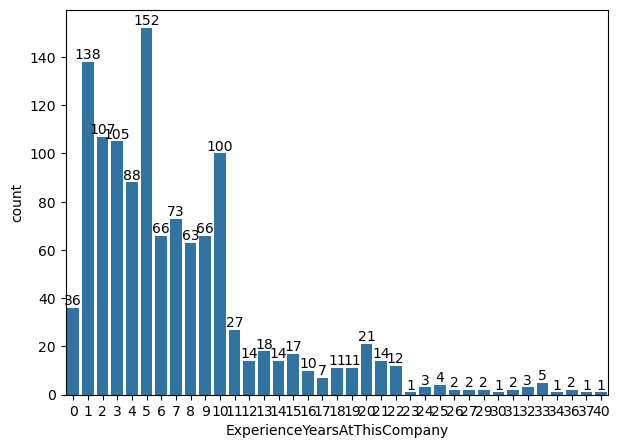

In [10]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='ExperienceYearsAtThisCompany',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=10)
plt.show()

# Insights from the above graph:
* Range of experience is from zero to 40 years, which is the maximum experience.
* 3% of employees are zero experienced or do not have experience.
* 49% of employees have Zero to five years of experience.
* 37% of employees have six to fifteen years of experience.
* 11% of the employee are having fifteen to forty years of experience.

# (24)ExperienceYearsInCurrentRole:

In [115]:
data.ExperienceYearsInCurrentRole.unique()

array([ 7, 13,  6,  2,  0,  1,  3,  8,  9,  5,  4, 14, 12, 10, 16, 11, 15,
       17, 18], dtype=int64)

In [116]:
data.ExperienceYearsInCurrentRole.value_counts()

ExperienceYearsInCurrentRole
2     303
0     190
7     176
3     107
4      92
8      78
9      63
1      46
6      30
5      29
10     25
11     18
13     10
14     10
12      7
16      7
15      4
17      3
18      2
Name: count, dtype: int64

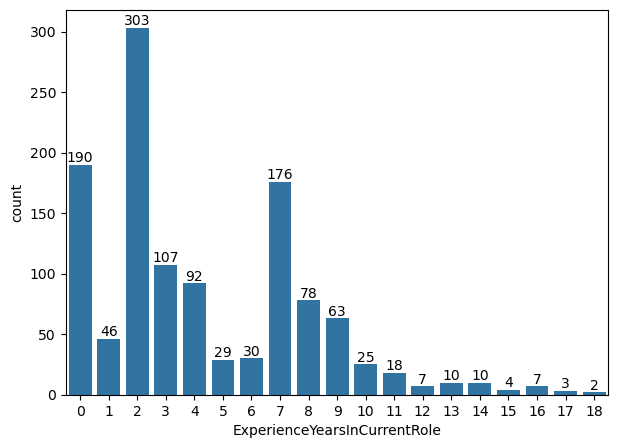

In [117]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='ExperienceYearsInCurrentRole',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')
plt.xlabel('ExperienceYearsInCurrentRole',fontsize=10)
plt.show()

# Insights from the above graph:
* 15% of employees have no experience (zero).
* 48% of employees have one to five years of experience, out of this percentage, employees with two years of experience in current role are more in number. 
* 35% of employees have experience in the range of 5 years to 17 years of experience in the current role and the highest being 18 years with two employees.

# (25)YearsSinceLastPromotion:

In [120]:
data.YearsSinceLastPromotion.unique()

array([ 0,  1, 12,  2,  3, 11,  7,  4,  5, 14,  8, 15,  6, 10, 13,  9],
      dtype=int64)

In [121]:
data.YearsSinceLastPromotion.value_counts()

YearsSinceLastPromotion
0     469
1     297
2     127
7      62
4      53
3      45
5      35
6      24
11     23
9      16
8      11
15     11
12      9
13      8
14      5
10      5
Name: count, dtype: int64

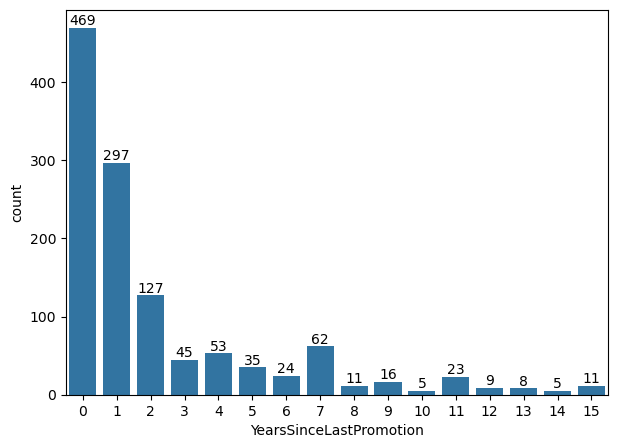

In [122]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='YearsSinceLastPromotion',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('YearsSinceLastPromotion',fontsize=10)
plt.show()

# Insights from the above graph:
* Highest no of years since the last promotion is 15 years and there are 11 employees under this category.
* 39% of employees are waiting to get promoted and this would be their first promotion.
* 24.7% of employees are waiting to get promoted since one year from last promotion.
* 10% of employees are waiting to get promoted since two years from last promotion.
* 24.6% of employees are waiting for their promotion in the range of 3 years to 14 years from their last promotion.

# (26)YearsWithCurrManager:

In [125]:
data.YearsWithCurrManager.unique()

array([ 8,  7, 12,  6,  2,  5,  0,  4, 13,  3,  1, 16,  9, 17, 11, 10, 14,
       15], dtype=int64)

In [126]:
data.YearsWithCurrManager.value_counts()

YearsWithCurrManager
2     281
0     215
7     176
3     103
8      87
4      85
1      67
9      53
6      28
5      26
10     22
11     20
12     14
13     10
17      6
15      3
16      2
14      2
Name: count, dtype: int64

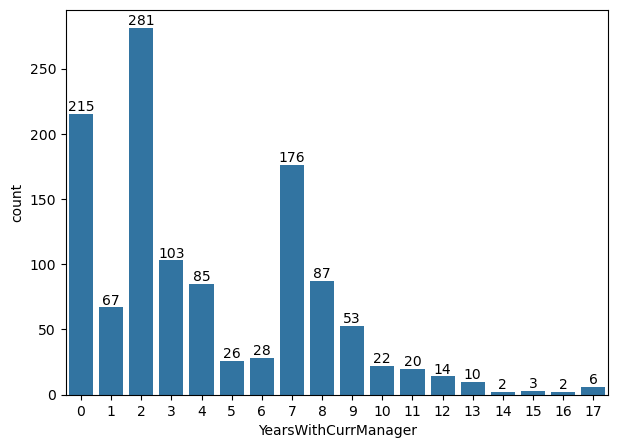

In [127]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='YearsWithCurrManager',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')
plt.xlabel('YearsWithCurrManager',fontsize=10)
plt.show()

# Insights from the above graph:
* 17.9% of employees have newly joined under current Manager.
* 23.4% of employees have completed two years under current Manager.
* 8.5% of employees have completed three years under current Manager.
* 14.6% of employees have completed seven years under current Manager.
* 35.4% of employees have been working under the current Manager rendering services anywhere between 4 years to 14 years.

# (27) Attrition:

In [130]:
data.Attrition.unique()

array(['No', 'Yes'], dtype=object)

In [131]:
data.Attrition.value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

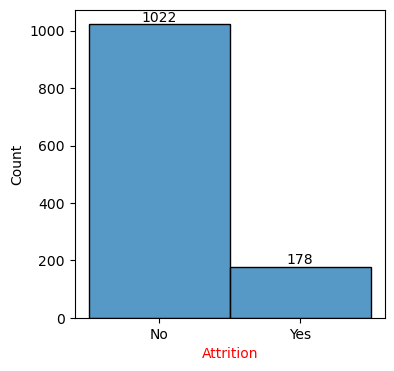

In [132]:
plt.figure(figsize=(4,4))
ax=sns.histplot(x='Attrition',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('Attrition',fontsize=10, color='red')
plt.show()

# Insights from the above graph:
* 1022 employees or 85.1 % of employees are not willing to leave the company.
* 178 employees or 14.8% of employees are willing to leave the company and the Attrition rate is approximately 15%

# (28)PerformanceRating:

In [135]:
data.PerformanceRating.unique()

array([3, 4, 2], dtype=int64)

In [136]:
data.PerformanceRating.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

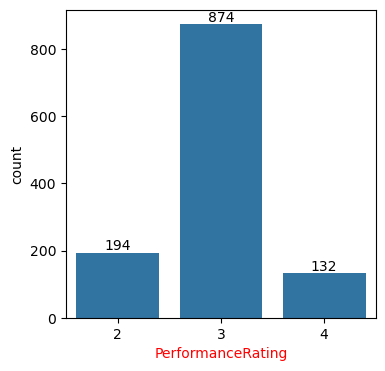

In [137]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='PerformanceRating',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.02  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')

plt.xlabel('PerformanceRating',fontsize=10, color='red')
plt.show()

# Insights from the above graph:
Performance is being rated on the below scale:
1 Low
2 Good
3 Excellent
4 Outstanding
* 3 rating has been achieved by 874 employees (72.8%), which is considered to be good score for the company.
* 4 rating has been achieved by 132 employees (11%) which is outstanding and they are more efficient.
* Combining both scores 3 & 4 rating , 83.8% of employees (1006 out of 1200 employees) have an excellent performance.
* 2 rating has been achieved by 194 employees (16.1%) whose performance is considered to be good/okay.

# BIVARIATE ANALYSIS:
* It helps in understanding relationship between categorical and Numerical features with regard to PreformanceRating.

# Analysing categorical features with PerformanceRating:

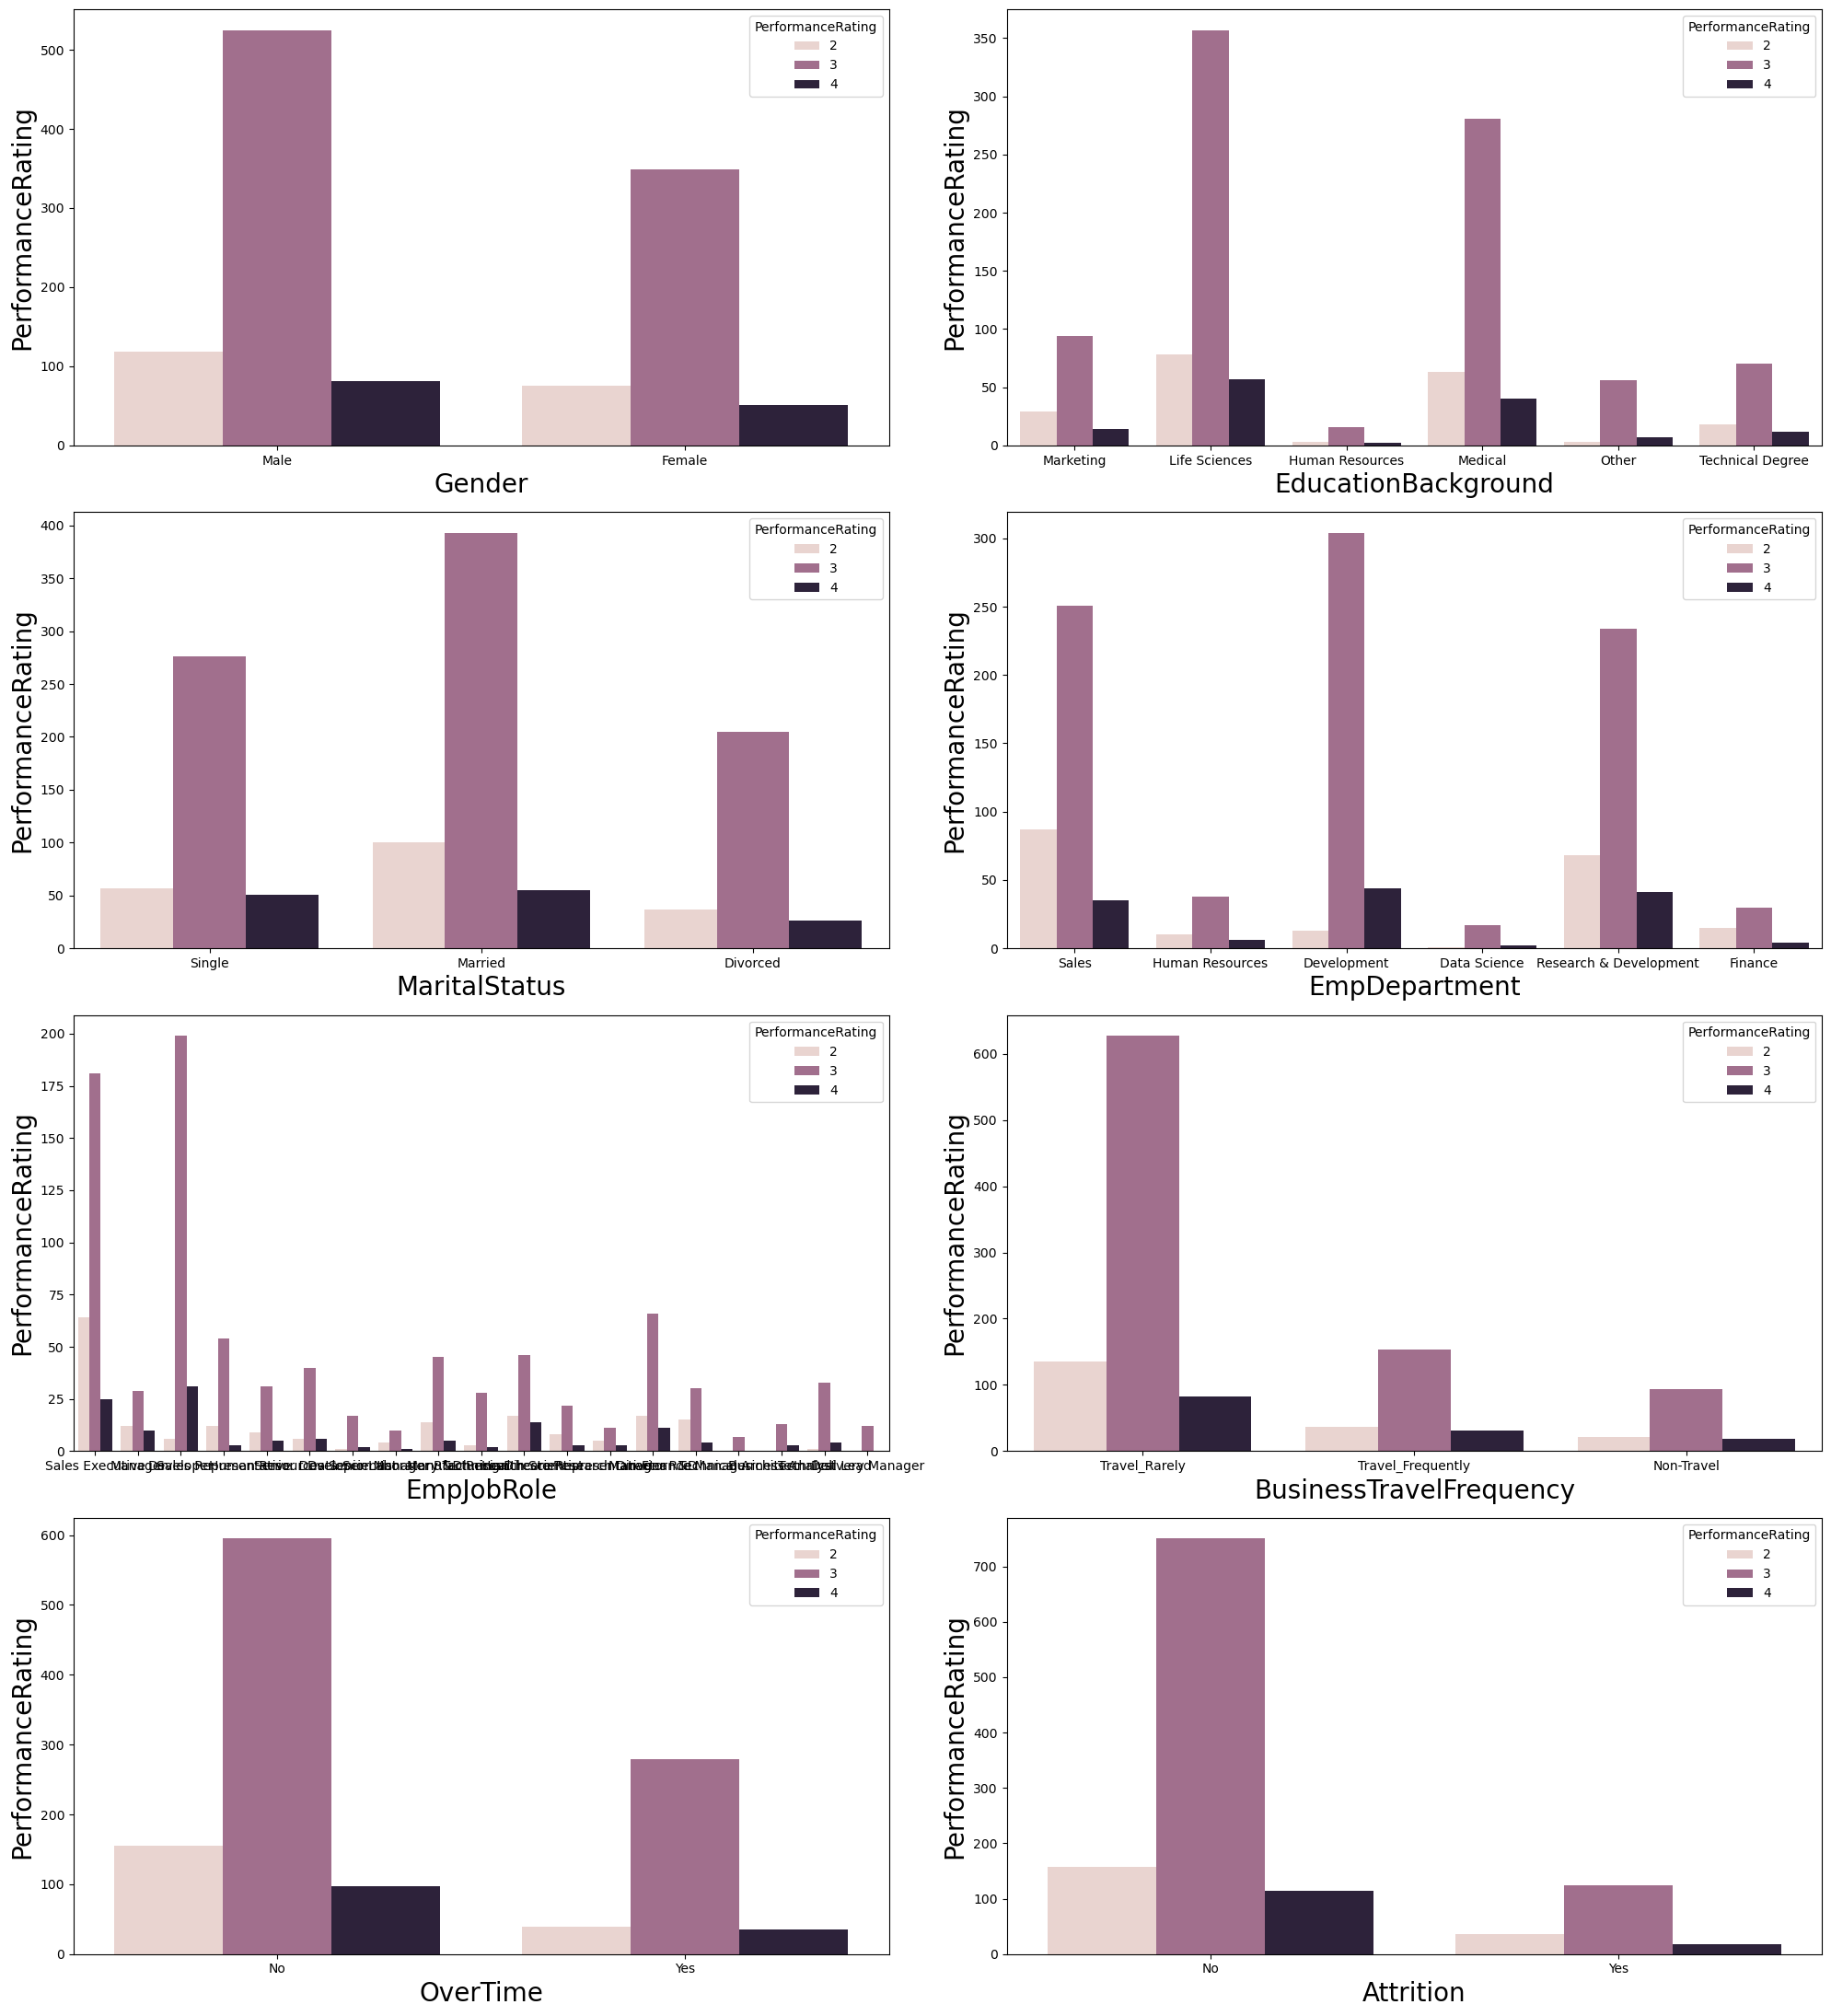

In [141]:
cat_cols = data[['Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','OverTime','Attrition']]
plt.figure(figsize=(20,22)) # defining canvas size
plotnum = 1 # counter

for column in cat_cols: # iteration of columns / acessing the columns from count
    if plotnum<=8:    # set the limit
        plt.subplot(4,2,plotnum) # # plotting 7 graphs (4-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=cat_cols[column],hue=data.PerformanceRating)
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating',fontsize=20) #y axis.
    plotnum+=1 # counter increment
plt.tight_layout()
plt.show()

# Insights from the graphs:
* 60% Male and 40% Female employees in the company and Gender ratio does not impact peformance and Male emplyees are leading with more performance rating.
* Number of the educational qualifications are six and employees with Life Sciences and Medical are leading performers.
* Most of the employees marital status is married and their performance is better than Single and Divorced.
* Six Departments in the company and Sales,Development and Research & Development depts leading in performances 
* Nineteen unique employee job roles present in the company and Sales Executive and Developer roles are leading in performances.
* Non Travelling Employees are more in number and their performace is the highest.
* Employees who do not do any Overtime are leading performers than those who do overtime.
* 1022 employees are satisfied and they are not planning to leave the company and 178 employees are ready to leave.

# Analysing numerical features with PerformanceRating:

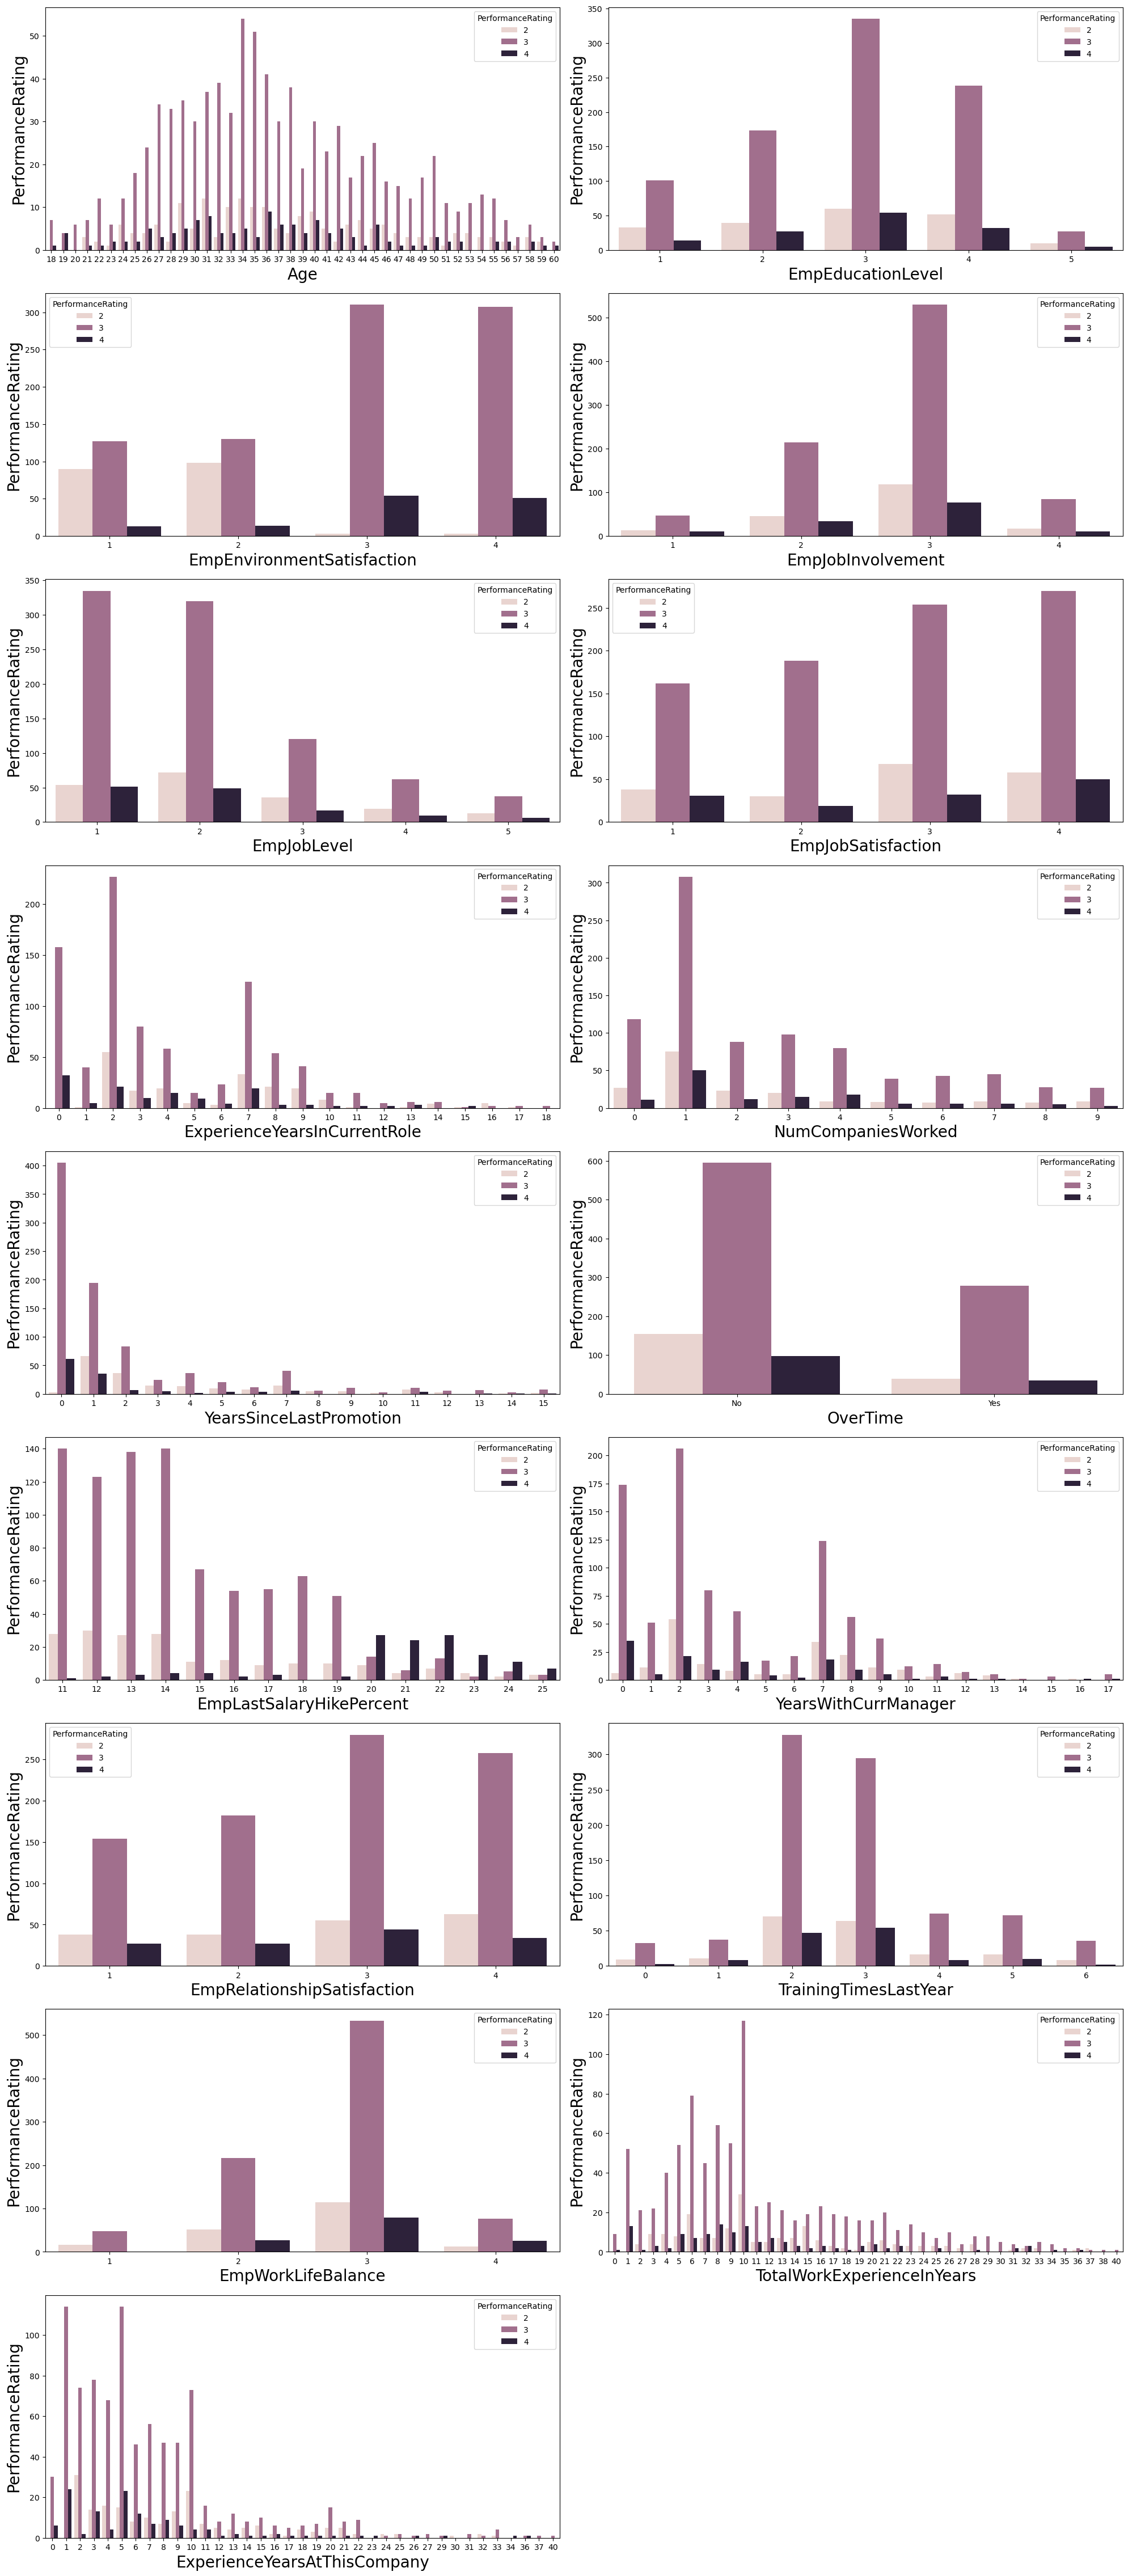

In [144]:
num_cols = data[['Age','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','ExperienceYearsInCurrentRole','NumCompaniesWorked','YearsSinceLastPromotion','OverTime','EmpLastSalaryHikePercent','YearsWithCurrManager','EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance','TotalWorkExperienceInYears','ExperienceYearsAtThisCompany']]
plt.figure(figsize=(20,50)) # defining canvas size
plotnum = 1 # counter

for column in num_cols: # iteration of columns / acessing the columns from count
    if plotnum<=18:    # set the limit
        plt.subplot(10,2,plotnum) # # plotting 16 graphs (4-rows,4-columns) ,plotnumber is for count
        sns.countplot(x=num_cols[column],hue=data.PerformanceRating)
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating',fontsize=20) #y axis.
    plotnum+=1 # counter increment
plt.tight_layout()
plt.show()

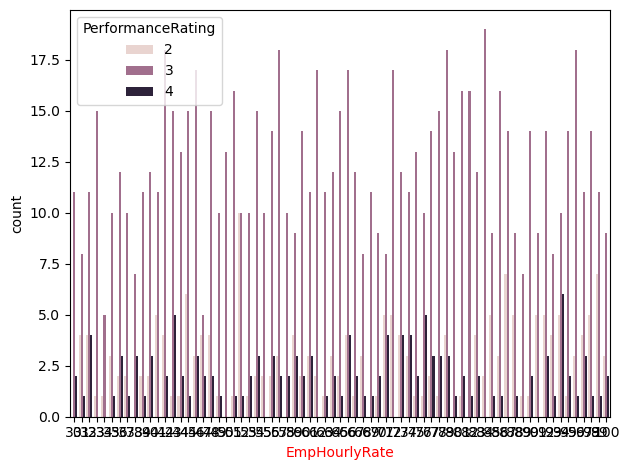

In [145]:
#plt.figure(figsize=(10,8))	
sns.countplot(data=data,x='EmpHourlyRate',hue=data.PerformanceRating)
plt.xlabel('EmpHourlyRate',fontsize=10, color='red')
plt.tight_layout()
plt.show()


# Insights from the above graphical presentation:
* Age - Performance rating peaks between 22 years and 42 years.
* Graduation is the highest qualification among employees and their performance is the highest along with Master's qualification.
* 60.6% of employees are very satisfied with their environment and their performance is highest.
* 70 % of the employees are highly involved in their jobs and their performance is highest.
* 73.41 % of empployees are from 1 and 2 Job levels.
* 61% of employees are having highest Job satisfaction and they are the highest performers.
* 0 to 5 years employees in the current role are the top performers.
* With zero and one year experience in the past are top performers in the company.
* Zero to two years since last prootion are the top performers in the company.
* Those who don't do overtime are performing well over the employees who do overtime.
* Employees who got 11% to 14% last salary hike are the top performers and who also got 20% to 22% last Salary hike are performing well.
* Employees with less no of years with current manager are performing well than those who have more no of years with current manager.
* 81.7% of employees have high employee relationship satisfaction and they are performing well.
* Employees with 2-3 training times last year are performing well.
* 70.1% of employees workLife balance score is better and they performance high.
*  Those who have experience 0 to 10 years in this company are performing well. 

# MULTIVARIATE ANALYSIS:
* It helps in understanding how multiple variables affect Performance rating. 

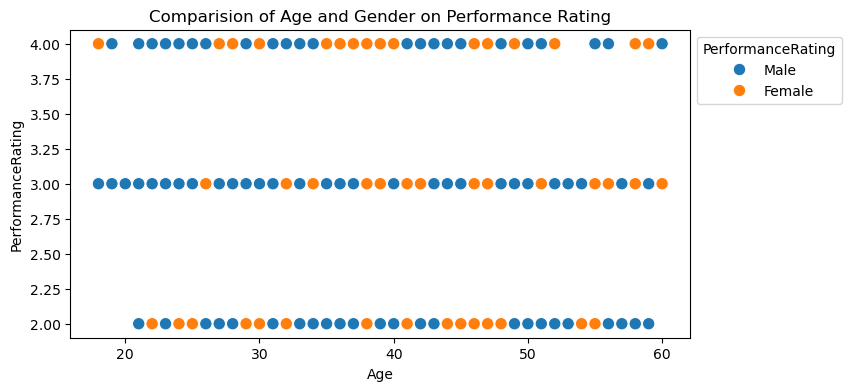

In [148]:
# Comparison of Age and Gender on Performance:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Age', y='PerformanceRating', hue='Gender', data=data, s=80)  # Use scatterplot for better visualization
plt.title('Comparision of Age and Gender on Performance Rating')
plt.xlabel('Age')
plt.ylabel('PerformanceRating')
plt.legend(title="PerformanceRating", bbox_to_anchor=(1, 1),loc='upper left')
#plt.grid(True)
plt.show()

Insight: 
* No Strong Age Correlation
* No clear indication that one gender outperforms the other in terms of performance rating.
* Both genders have a similar distribution of ratings across all ages.

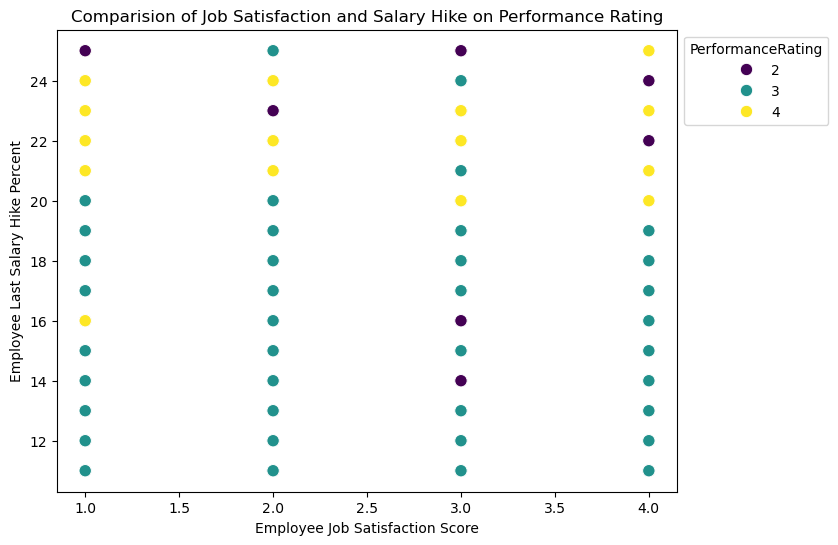

In [150]:
# Comaparision of Job Staisfaction and Salary Hike on Performance Rating:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='EmpJobSatisfaction', y='EmpLastSalaryHikePercent', hue='PerformanceRating', data=data, s=80,palette='viridis')
plt.title('Comparision of Job Satisfaction and Salary Hike on Performance Rating')
plt.legend(title="PerformanceRating", bbox_to_anchor=(1, 1),loc='upper left')
plt.xlabel('Employee Job Satisfaction Score')
plt.ylabel('Employee Last Salary Hike Percent')
plt.show()

* Employees who received higher salary hikes tend to have better performance ratings.  This suggests that salary increase improves performance.
* Some highly satisfied employees show high performance, there are also highly satisfied employees with lower performance ratings.  It indicates that job satisfaction alone may not be the sole determinant of performance.
* Employees with both high job satisfaction and substantial salary increase, exhibit the strongest tendency towards higher performance ratings.  Conversely, low salary hikes seem to negatively affect performance regardless of job satisfaction.

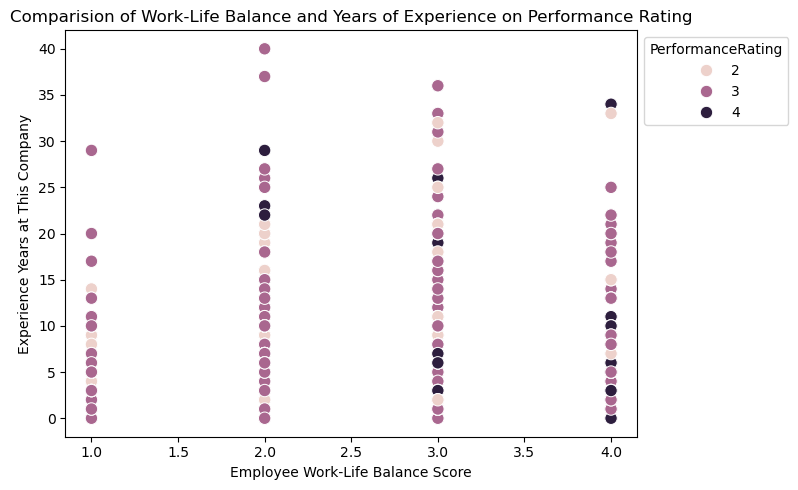

In [152]:
# Comparision of EmpWorkLifeBalance and ExperienceYearsAtThisCompany on Performance rating')
plt.figure(figsize=(8, 5))
sns.scatterplot(x='EmpWorkLifeBalance', y='ExperienceYearsAtThisCompany', hue='PerformanceRating',data=data, s=80)
plt.title('Comparision of Work-Life Balance and Years of Experience on Performance Rating')
plt.legend(title="PerformanceRating", bbox_to_anchor=(1, 1),loc='upper left')
plt.xlabel('Employee Work-Life Balance Score')
plt.ylabel('Experience Years at This Company')
plt.tight_layout()
plt.show()

* Positive work-life balance may correlate with higher performance ratings.
* High performers (Rating 4) are spread across a wide range of experience years, mostly spread between 5 to 25 years.
* Employees with moderate experience and good work-life balance tend to be among the highest performers.

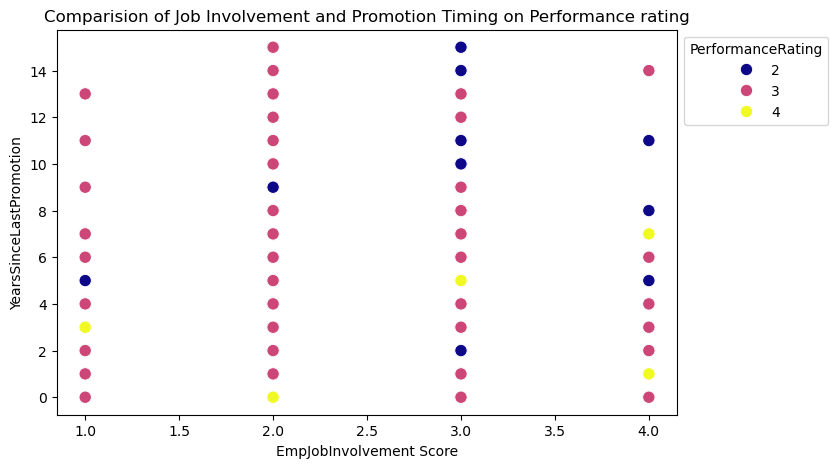

In [154]:
# Comparision of Job Involvement and Promotion Timing on Performance rating')
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='EmpJobInvolvement', y="YearsSinceLastPromotion", hue="PerformanceRating",s=80,palette='plasma')
plt.title('Comparision of Job Involvement and Promotion Timing on Performance rating')
plt.legend(title="PerformanceRating", bbox_to_anchor=(1, 1),loc='upper left')
plt.xlabel('EmpJobInvolvement Score')
plt.ylabel('YearsSinceLastPromotion')
plt.show()

* Across all involvement levels, Rating 3 is the most common.
* Employees recently promoted (0–2 years) show more involvement with scores 3 and 4.
* Gap of more no. of years in promotion is affecting job involvement and performance scores.

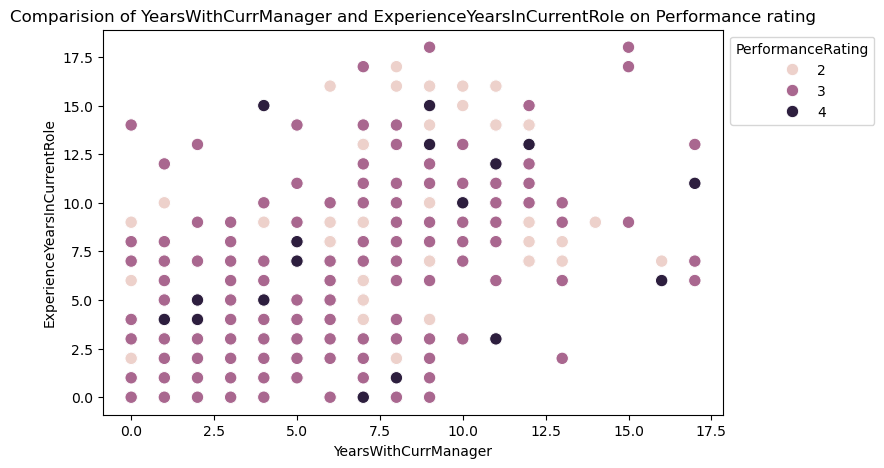

In [156]:
# Comparision of Years of Experience in Current role and under current Manager on Performance rating')
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='YearsWithCurrManager', y="ExperienceYearsInCurrentRole", hue="PerformanceRating",s=80)
plt.title('Comparision of YearsWithCurrManager and ExperienceYearsInCurrentRole on Performance rating')
plt.legend(title="PerformanceRating", bbox_to_anchor=(1, 1),loc='upper left')
plt.show()

* Moderate years with the current manager and in the current role (approx. 4–10 years) are more associated with higher performance ratings.
* Very long tenure in the same role/under the same manager may correspond to lower performance ratings.
* high performers emerge early, showing that high performance sn't exclusively tied to tenure. 

# DEPARTMENT WISE PERFORMANCE RATING:

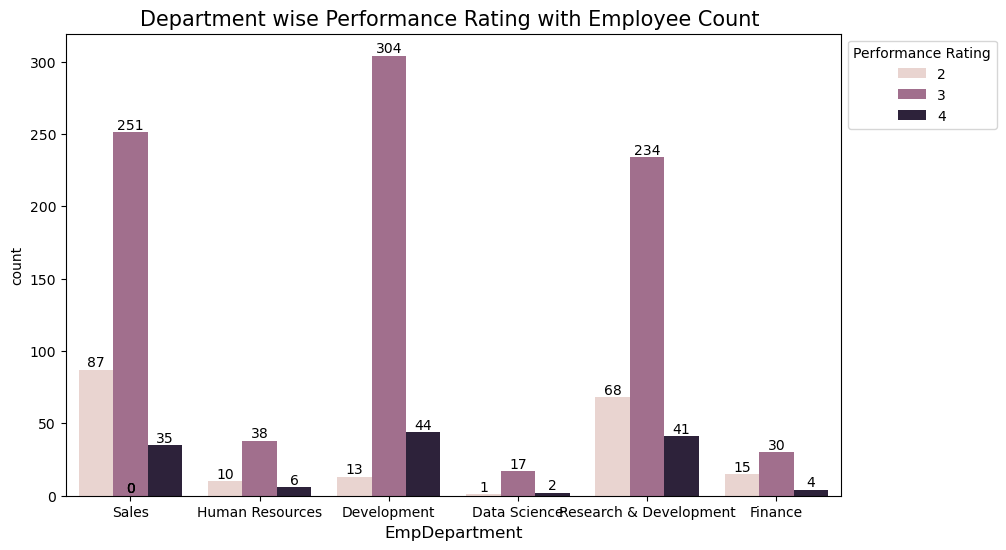

In [159]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='EmpDepartment',hue='PerformanceRating',data=data)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width/2
    y = height + 0.06  # Slightly above the bar
    ax.text(x, y, f'{int(height)}', ha='center',va='bottom')
plt.title('Department wise Performance Rating with Employee Count ',fontsize=15)
plt.legend(title="Performance Rating", bbox_to_anchor=(1, 1),loc='upper left')
plt.xlabel('EmpDepartment',fontsize=12)
plt.show()

In [160]:
percentage = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percentage.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


    Rank	Department	Combined % (Rating 3 + 4)
    1	Development	    29.00%
    2	Sales	        23.84%
    3	Research & Dev	22.92%
    4	Human Resources	3.67%
    5	Finance	        2.83%
    6	Data Science	1.59%

# Load the encoded data to check Correlation:

In [12]:
data1= pd.read_csv('Encoded_data.csv')

In [13]:
data1

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,1
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,1
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,2
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,5,6,1,6,0,1
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0,4,0,2
1196,37,1,1,2,1,15,2,10,2,4,...,1,4,2,3,1,0,0,0,0,1
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,3,3,20,8,3,8,0,1
1198,34,0,3,2,0,1,2,9,3,4,...,2,9,3,4,8,7,7,7,0,1


In [14]:
data1.PerformanceRating.unique()

array([1, 2, 0])

In [15]:
# Check the Correlation between Features in a tabular presentation:
data1.corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.559662,0.016761,-0.019563,0.176752,0.185951,0.121078,0.187042,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.060534,-0.047853,0.015793,-0.053683,-0.023985,-0.028153,-0.039737,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,...,0.005652,-0.016705,0.035002,0.022890,0.006914,0.007309,0.008085,0.001657,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.096627,0.013552,0.014154,-0.047122,-0.067115,-0.013159,-0.065892,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,...,-0.050286,0.011727,0.025397,0.068875,0.069587,0.068314,0.054917,0.047389,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,...,-0.043067,-0.017979,0.015253,-0.007519,0.041822,0.034071,0.036698,0.017096,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.032795,0.029727,-0.040969,-0.017051,-0.010188,0.022616,-0.051463,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.035134,-0.036361,-0.044788,0.044539,0.025994,0.027552,0.014473,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.119202,-0.000499,0.010276,0.073043,0.069838,0.041243,0.073803,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.042040,0.013503,-0.000262,0.006995,0.047522,0.012837,-0.007706,-0.123490,0.395561


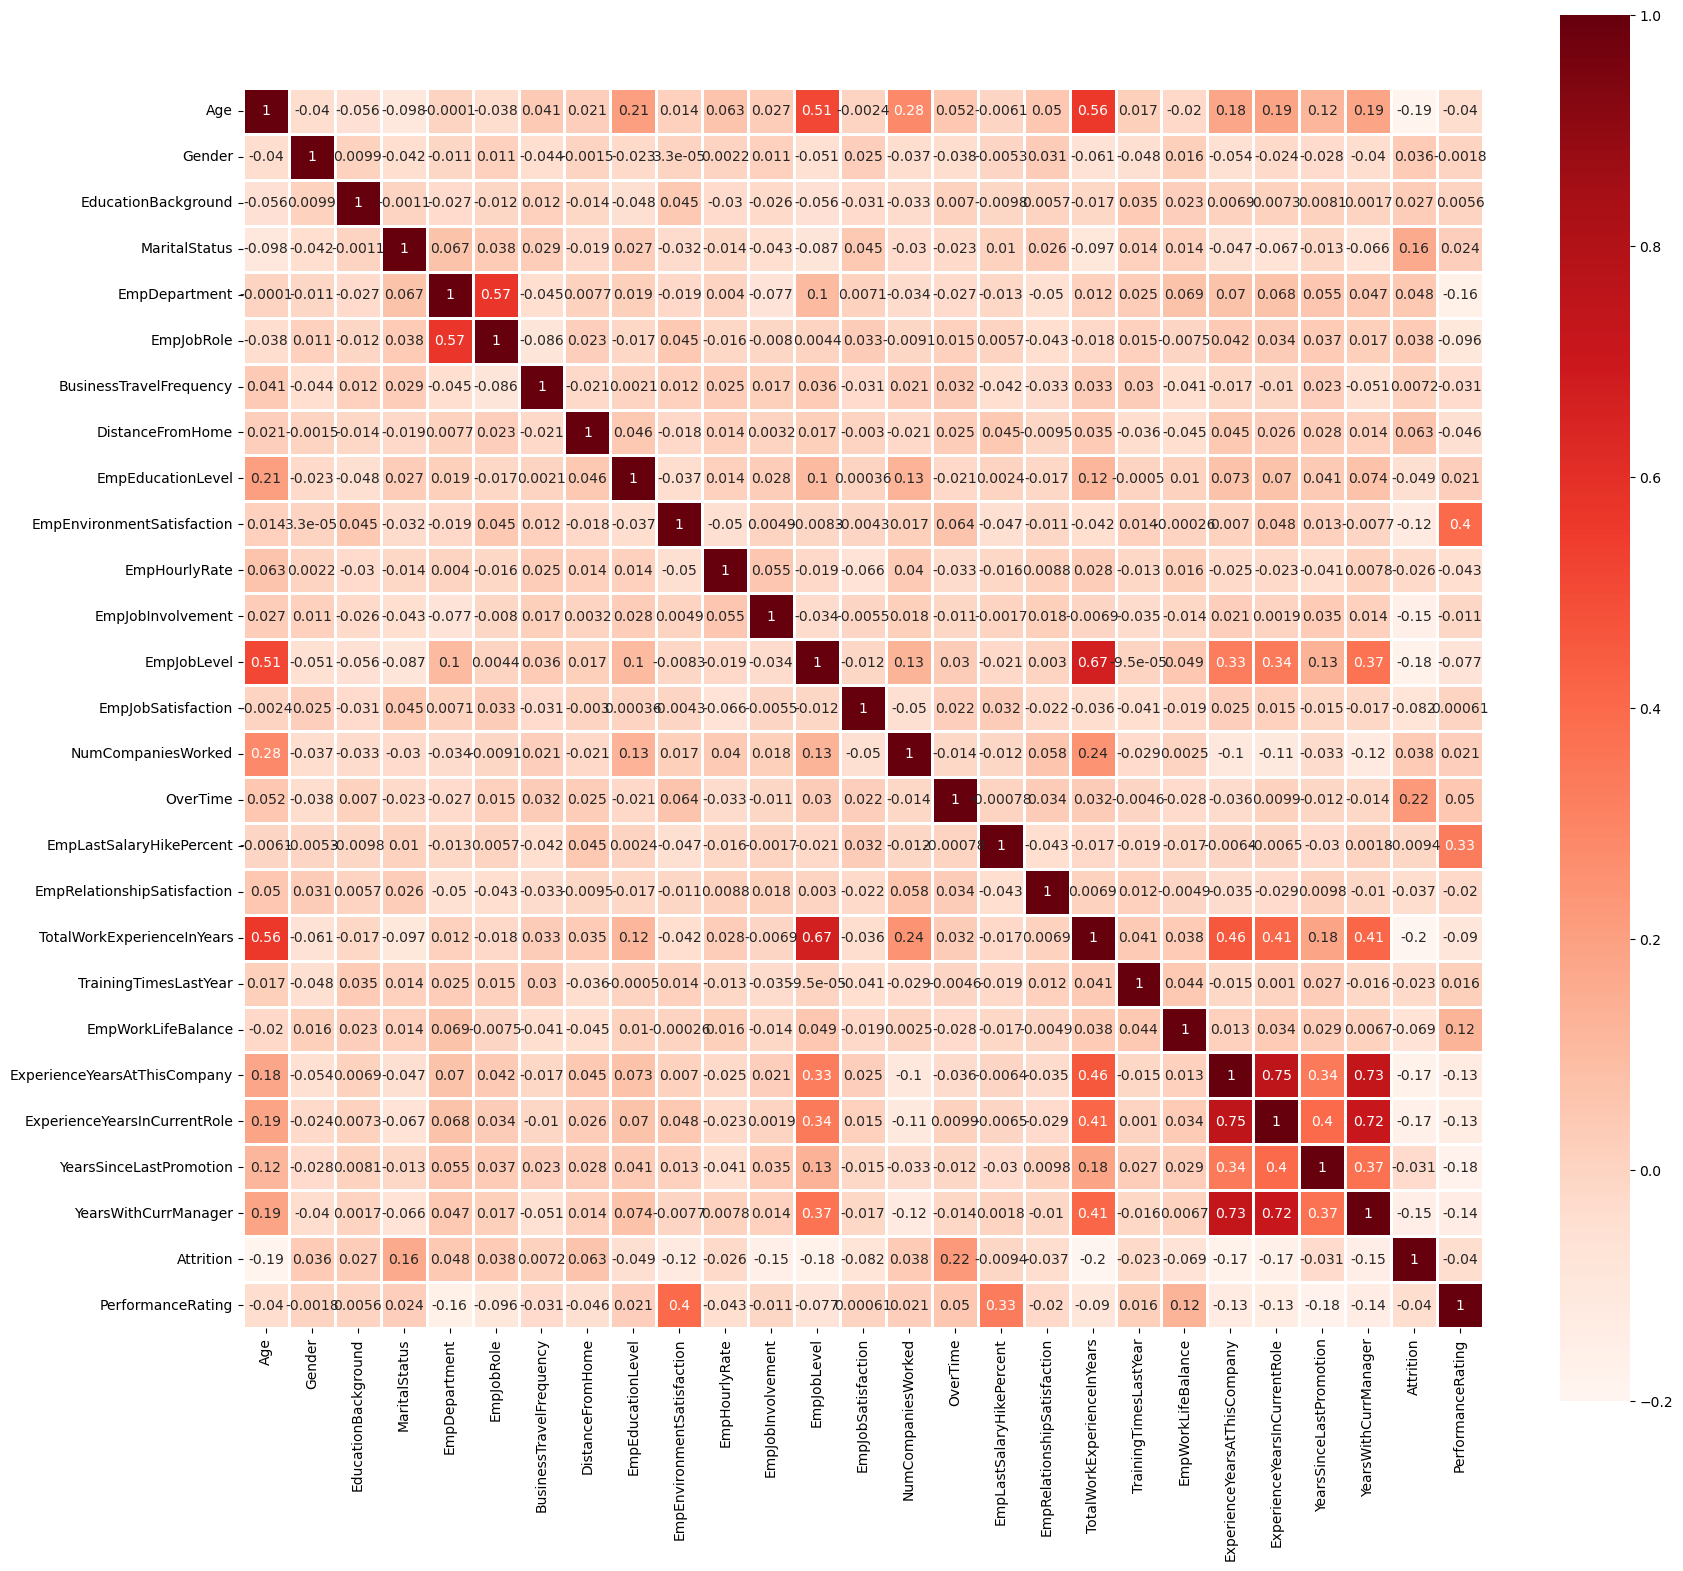

In [16]:
# Correlation graphically
plt.figure(figsize=(20,18))
ax = sns.heatmap(data1.corr(),annot=True,cmap='Reds',cbar=True,annot_kws={"size": 10},
            linewidths=2, linecolor='white',square=True)
plt.show()

**From the above Heatmap, we can cleary see that there is no high correlation between features and Target column(Performance Rating). And We see some other faetures having a higher correlation which are:**
* EmpDepartment
* ExperienceYearsAtThisCompany
* ExperienceYearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager
* ExperienceYearsAtThisCompany
* TotalWorkExperienceInYears
* EmpJobLevel
* EmpJobRole

# Top 3 Important Factors affecting employee performance as per Heatmap(representing correlations).
1. EmpEnvironmentSatisfaction.
2. EmpLastSalaryHikePercent
3. EmpWorkLifeBalance

**Top 3 Important Factors given by RandomForestClassifier):**
**modelrf.feature_importances_**
1. EmpLastSalaryHikePercentage.
2. EmpEnvironmentSatisfaction.
3. YearsSinceLastPromotion.

**Suggestions for improvement of Employee Performance are:**
1. Timely Hikes should be given to employees to encourage them to perform well in all aspects.
2. Checks should be done at regular intervals to know employee satisfaction with his/her environment.
3. Promoting Employees judiciously by recognising their sincere efforts.
4. Assesment of Job satisfaction should be done with employees through interaction by the HRs.
5. Job roles should be assigned by assessing employee knowledge,committment, dependability, excution time and any other factors related to the role.

**End of Notebook**